# Question 1
Handling improper integral by mapping x to z (z=x/(c+x))

In [14]:
import numpy as np

def f_old_integrand(x):
    return x**3/(np.exp(x)-1)  #Integral runs from 0 to inf

def f_old_derivative(x):
    return ((np.exp(x)*3*x**2)-(x**3*(np.exp(x))))/(np.exp(x)-1)**2

X=np.linspace(0.01,10,10000)
for i in range(len(X)):
    if f_old_derivative(X[i])*f_old_derivative(X[i+1])<0:   #point of maxima. Its good to use c near the maximum point for f_old_integrand 
        c=X[i]
        break

#z=x/(c+x) is applied transformation
def f_new_integrand(z):
    return ((z*c)**3)*c/((1-z)**5*(np.exp(z*c/(1-z))-1))

a=0.01
b=0.99
S0,S=0,0
n=10
              
while True:
    h=(b-a)/n
    a=a*0.7
    b=b+(1-b)*0.4
    S=(2*sum([f_new_integrand(a+i*h) for i in range (1,n)])+f_new_integrand(a)+f_new_integrand(b))*(h/2)                
    if abs(S-S0)<0.0001:
        break
    n=n+1
    S0=S
    
print('The value of integral is :',format(S,'0.4f'))

The value of integral is : 6.4941


C:\Users\parth\AppData\Local\Temp\ipykernel_14320\4253244372.py:17: RuntimeWarning: overflow encountered in exp
  return ((z*c)**3)*c/((1-z)**5*(np.exp(z*c/(1-z))-1))


# Question 2
Handling error function

The value of integral for upper limit 0.0 is : 0.0000

The value of integral for upper limit 0.1 is : 0.0996

The value of integral for upper limit 0.2 is : 0.1973

The value of integral for upper limit 0.3 is : 0.2911

The value of integral for upper limit 0.4 is : 0.3796

The value of integral for upper limit 0.5 is : 0.4612

The value of integral for upper limit 0.6 is : 0.5350

The value of integral for upper limit 0.7 is : 0.6006

The value of integral for upper limit 0.8 is : 0.6576

The value of integral for upper limit 0.9 is : 0.7061

The value of integral for upper limit 1.0 is : 0.7467

The value of integral for upper limit 1.1 is : 0.7800

The value of integral for upper limit 1.2 is : 0.8067

The value of integral for upper limit 1.3 is : 0.8277

The value of integral for upper limit 1.4 is : 0.8439

The value of integral for upper limit 1.5 is : 0.8561

The value of integral for upper limit 1.6 is : 0.8652

The value of integral for upper limit 1.7 is : 0.8718

The value 

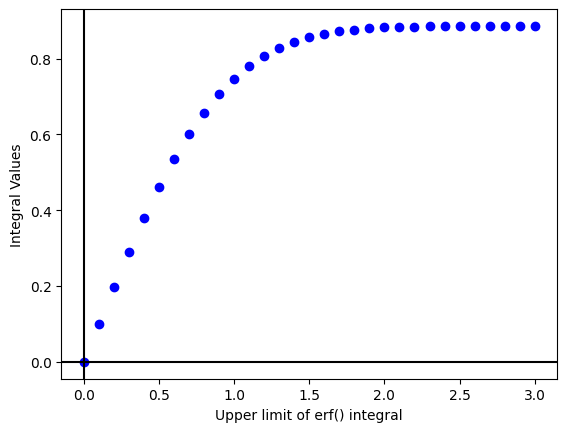

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

a=0
b=np.arange(0,3.1,0.1)

def simps(a,b,f):
    S0=0
    S1=f(a)+f(b)
    n=2
    while abs(S1-S0)>0.0000001:
        S0=S1
        h=(b-a)/n
        k=4
        for i in range(1,n):                                     
            S1=S1+k*f(a+i*h)
            k=6-k
        S1=S1*(h/3)
        n=n+2
    return S1

S1_list=[]
for i in range(len(b)):
    S1=simps(a,b[i],f)
    S1_list.append(S1)
    print('The value of integral for upper limit',np.round(b[i],3),'is :',format(S1,'0.4f'))
    print()

plt.plot(b,S1_list,'bo')
plt.axhline(color='black')
plt.axvline(color='black')
plt.xlabel('Upper limit of erf() integral')
plt.ylabel('Integral Values')
plt.show()